In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image, display

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
# Data
df2015 = pd.read_csv("data/happiness/2015.csv")
df2016 = pd.read_csv("data/happiness/2016.csv")
df2017 = pd.read_csv("data/happiness/2017.csv")
df2018 = pd.read_csv("data/happiness/2018.csv")
df2019 = pd.read_csv("data/happiness/2019.csv")

# Data analysis

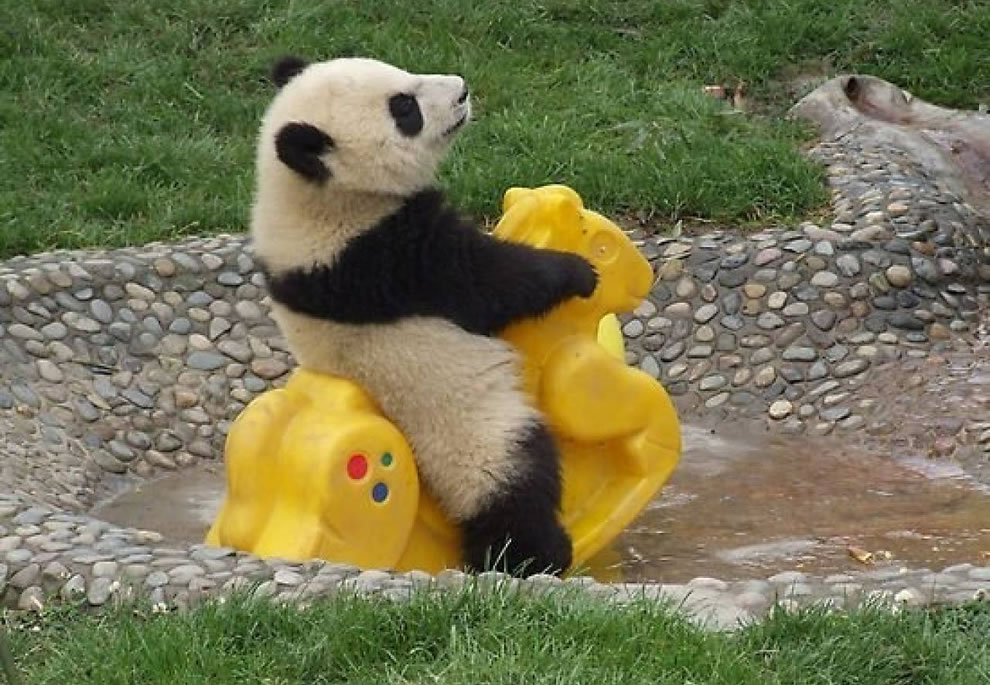

In [7]:
display(Image(filename='data/images/cute_panda_fun.jpg'))

## Summary operators (mean, mode, median)

In [8]:
df2019.mean()

/var/folders/85/y3q1qszx6f14lygqxqvz4kp40000gn/T/ipykernel_31367/1752753846.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2019.mean()


Overall rank                    78.500000
Score                            5.407096
GDP per capita                   0.905147
Social support                   1.208814
Healthy life expectancy          0.725244
Freedom to make life choices     0.392571
Generosity                       0.184846
Perceptions of corruption        0.110603
dtype: float64

In [9]:
columnsOfInterest = ["Score", "GDP per capita", "Social support"]
df2019[columnsOfInterest].mean()

Score             5.407096
GDP per capita    0.905147
Social support    1.208814
dtype: float64

In [10]:
columnsOfInterest = ["Score", "GDP per capita", "Social support"]
df2019[columnsOfInterest].median()

Score             5.3795
GDP per capita    0.9600
Social support    1.2715
dtype: float64

In [11]:
columnsOfInterest = ["Score", "GDP per capita", "Social support"]
df2019[columnsOfInterest].mode()

,Score,GDP per capita,Social support
0,5.208,0.96,1.465


"The mode of a set of values is the value that appears most often. It can be multiple values."

In [12]:
df2019[df2019.Score==5.208]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182


##### Min, max

In [13]:
maxGDP = df2019["GDP per capita"].max()
df2019[df2019["GDP per capita"] == maxGDP]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.22,0.167


In [14]:
minGDP = df2019["GDP per capita"].min()
df2019[df2019["GDP per capita"] == minGDP]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
111,112,Somalia,4.668,0.0,0.698,0.268,0.559,0.243,0.27


## Create new columns based on existing columns

In [15]:
df2019["Generosity new"] = df2019["Generosity"] * 100

In [16]:
df2019["Generosity new"]

0      15.3
1      25.2
2      27.1
3      35.4
4      32.2
       ... 
151    21.7
152    27.6
153    15.8
154    23.5
155    20.2
Name: Generosity new, Length: 156, dtype: float64

## Counting

In [17]:
df2016 = pd.read_csv("data/happiness/2016.csv")

In [18]:
df2016.Region.value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

##### Compute proportions

In [19]:
df2016.Region.value_counts(normalize=True)

Sub-Saharan Africa                 0.242038
Central and Eastern Europe         0.184713
Latin America and Caribbean        0.152866
Western Europe                     0.133758
Middle East and Northern Africa    0.121019
Southeastern Asia                  0.057325
Southern Asia                      0.044586
Eastern Asia                       0.038217
North America                      0.012739
Australia and New Zealand          0.012739
Name: Region, dtype: float64

##### Select multiple columns

In [20]:
df2016.value_counts(subset=["Region", "Country"])

Region                       Country       
Australia and New Zealand    Australia         1
Sub-Saharan Africa           Ethiopia          1
                             Burkina Faso      1
                             Burundi           1
                             Cameroon          1
                                              ..
Latin America and Caribbean  Panama            1
                             Paraguay          1
                             Peru              1
                             Puerto Rico       1
Western Europe               United Kingdom    1
Length: 157, dtype: int64

## Aggregating data

Data aggregation is any process whereby data is gathered and expressed in a summary form.

In [21]:
df2016.groupby("Region").mean()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101
Sub-Saharan Africa,129.657895,4.136421,4.024895,4.247947,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348,2.166359


##### Sort by happiness score

In [22]:
df2016.groupby("Region").mean().sort_values(by='Happiness Score', ascending=False)

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Western Europe,29.190476,6.685667,6.604571,6.766762,1.417056,1.042452,0.825754,0.477587,0.232544,0.304715,2.385576
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101


Calculate the mean only for a specific column.

In [33]:
df2016.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64

Sort values.

In [34]:
df2016.groupby("Region")["Happiness Score"].mean().sort_values()

Region
Sub-Saharan Africa                 4.136421
Southern Asia                      4.563286
Southeastern Asia                  5.338889
Central and Eastern Europe         5.370690
Middle East and Northern Africa    5.386053
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Western Europe                     6.685667
North America                      7.254000
Australia and New Zealand          7.323500
Name: Happiness Score, dtype: float64

##### Alternative way

In [23]:
df2016.groupby("Region").agg('mean')

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,8.500000,7.323500,7.252500,7.394500,1.402545,1.138770,0.841080,0.574920,0.371175,0.484040,2.511015
Central and Eastern Europe,78.448276,5.370690,5.283690,5.457690,1.047537,0.861855,0.631592,0.300528,0.088072,0.170898,2.270222
Eastern Asia,67.166667,5.624167,5.550167,5.698167,1.277312,0.910428,0.806680,0.387282,0.118347,0.223563,1.900682
Latin America and Caribbean,48.333333,6.101750,5.976750,6.226750,0.993410,0.898432,0.612703,0.426646,0.106016,0.208428,2.856078
Middle East and Northern Africa,78.105263,5.386053,5.274895,5.497211,1.139323,0.695644,0.616438,0.309769,0.161526,0.186749,2.276677
North America,9.500000,7.254000,7.177500,7.330500,1.474055,1.071960,0.803300,0.527665,0.230985,0.429555,2.716335
Southeastern Asia,80.000000,5.338889,5.249556,5.428222,0.896381,0.791756,0.561369,0.490123,0.148104,0.446150,2.004910
Southern Asia,111.714286,4.563286,4.485000,4.641571,0.660671,0.480694,0.453670,0.350026,0.104899,0.343281,2.170101
Sub-Saharan Africa,129.657895,4.136421,4.024895,4.247947,0.474321,0.593656,0.239872,0.315424,0.120379,0.226348,2.166359


In [24]:
df2016.groupby("Region").agg({"Happiness Score": ["sum", "mean"]})

Happiness Score          
                                            sum      mean
Region                                                   
Australia and New Zealand                14.647  7.323500
Central and Eastern Europe              155.750  5.370690
Eastern Asia                             33.745  5.624167
Latin America and Caribbean             146.442  6.101750
Middle East and Northern Africa         102.335  5.386053
North America                            14.508  7.254000
Southeastern Asia                        48.050  5.338889
Southern Asia                            31.943  4.563286
Sub-Saharan Africa                      157.184  4.136421
Western Europe                          140.399  6.685667

# Data visualization

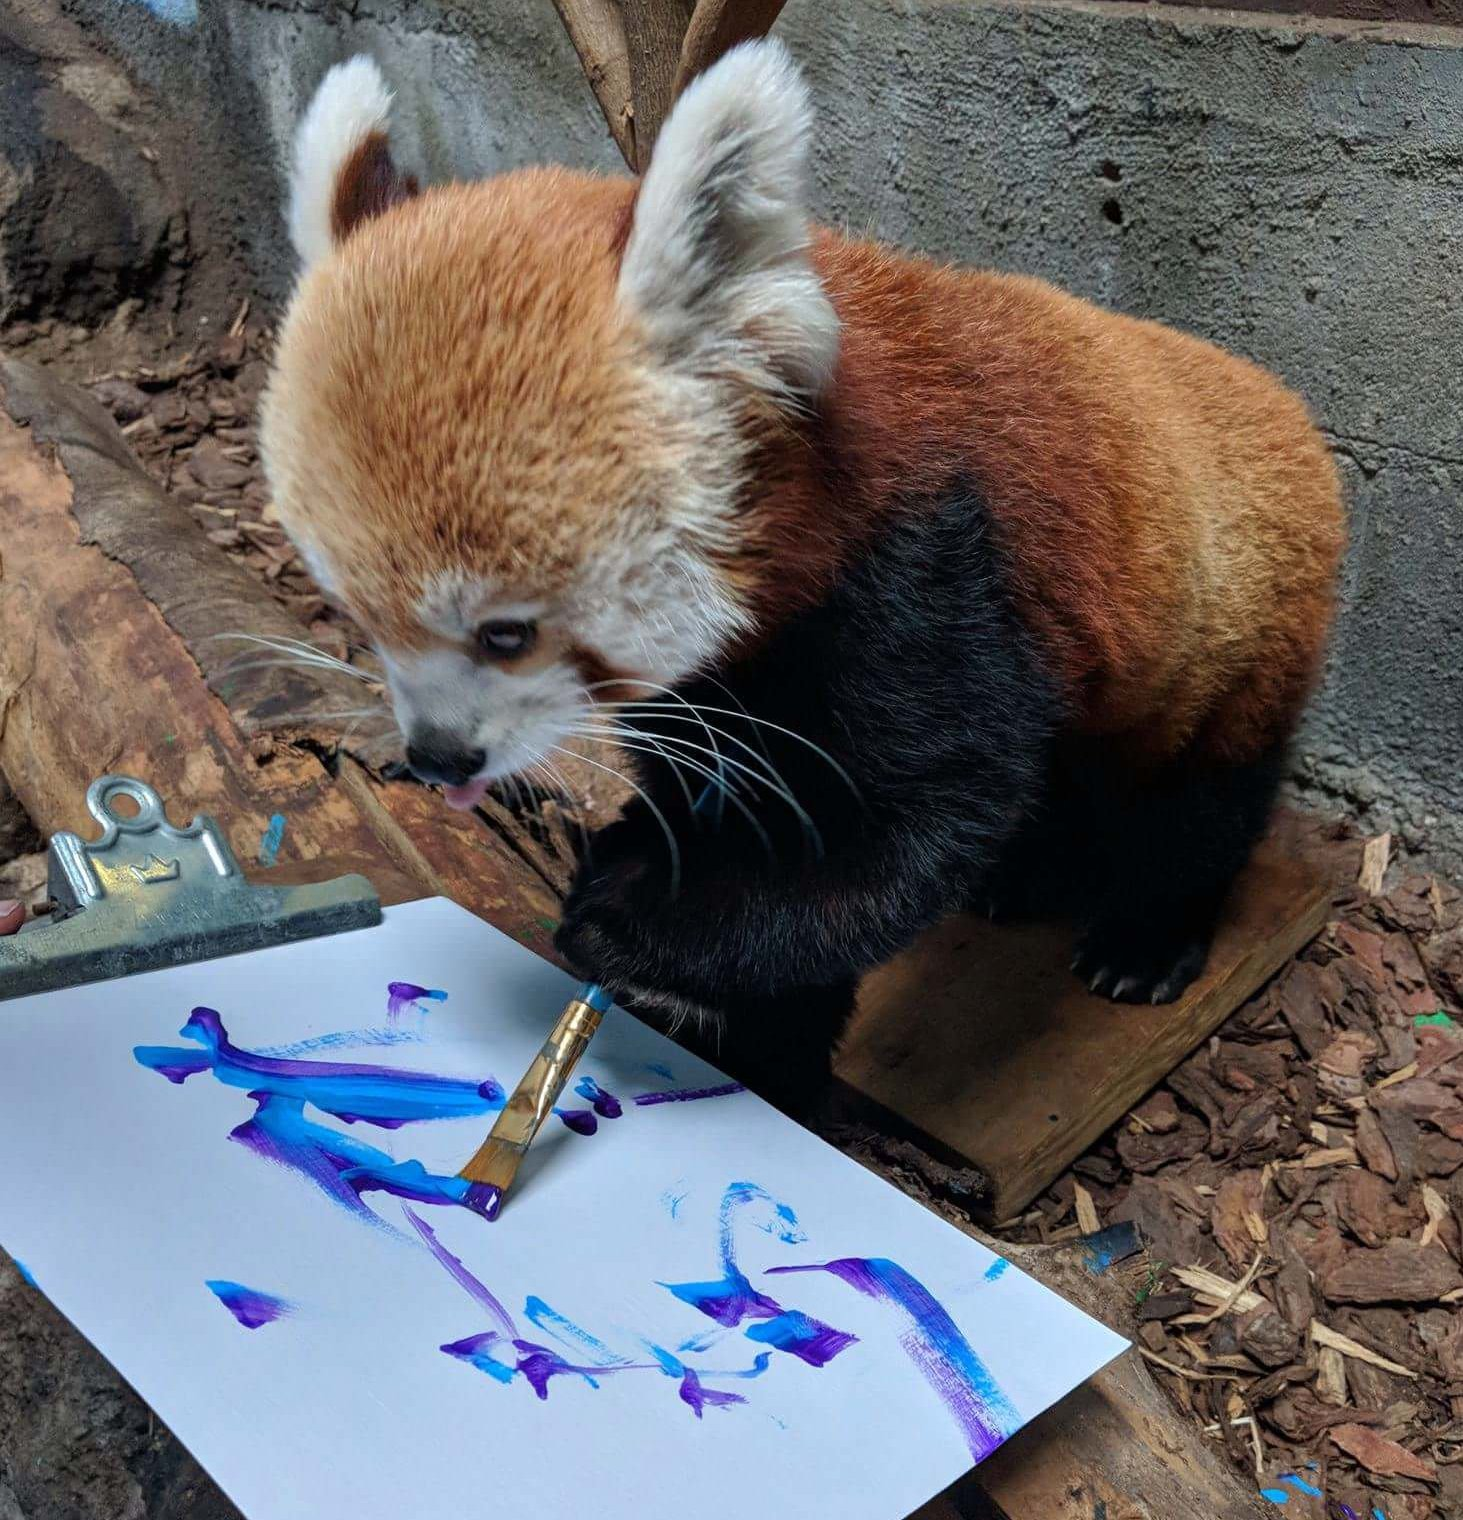

In [25]:
display(Image(filename='data/images/cute_panda_painting.jpg'))

In [39]:
#Make the graphs a bit prettier
plt.style.use('ggplot')

## Using pandas' plotting functions

### Bar plots

In [26]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Generosity new'],
      dtype='object')

##### Number of countries per region

<AxesSubplot:>

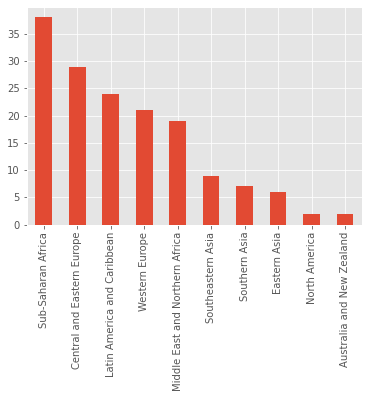

In [27]:
df2016["Region"].value_counts().plot.bar()

##### Happiness scores per region (sorted)

<AxesSubplot:xlabel='Region'>

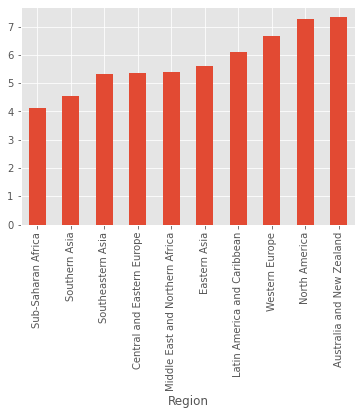

In [28]:
df2016.groupby("Region")["Happiness Score"].mean().sort_values().plot.bar()

##### Adjust image size

<AxesSubplot:xlabel='Region'>

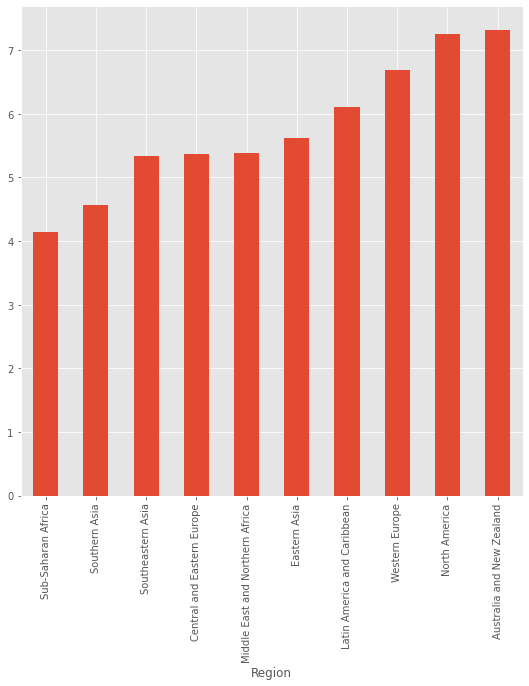

In [29]:
_, ax = plt.subplots(1, 1, figsize=(9, 9))

df2016.groupby("Region")["Happiness Score"].mean().sort_values().plot.bar(ax=ax)

### Histograms

<AxesSubplot:ylabel='Frequency'>

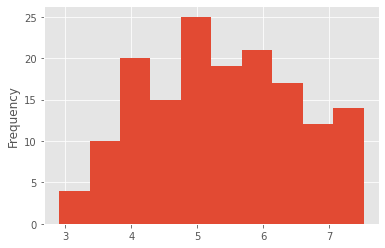

In [31]:
df2016["Happiness Score"].plot.hist()

### Boxplots

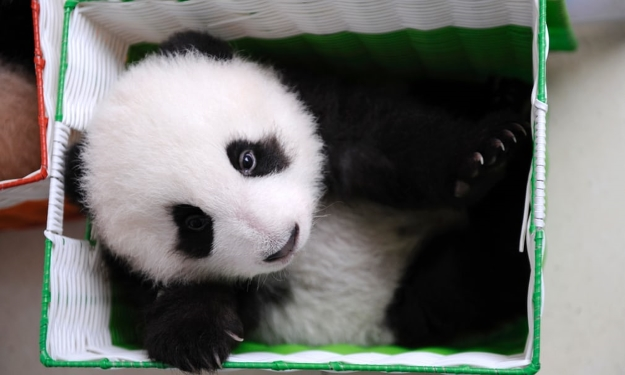

In [170]:
display(Image(filename='data/images/cute_panda_box.jpg'))

In descriptive statistics, a box plot or boxplot (also known as a box and whisker plot) is a type of chart often used in explanatory data analysis. Box plots visually show the distribution of numerical data and skewness by displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

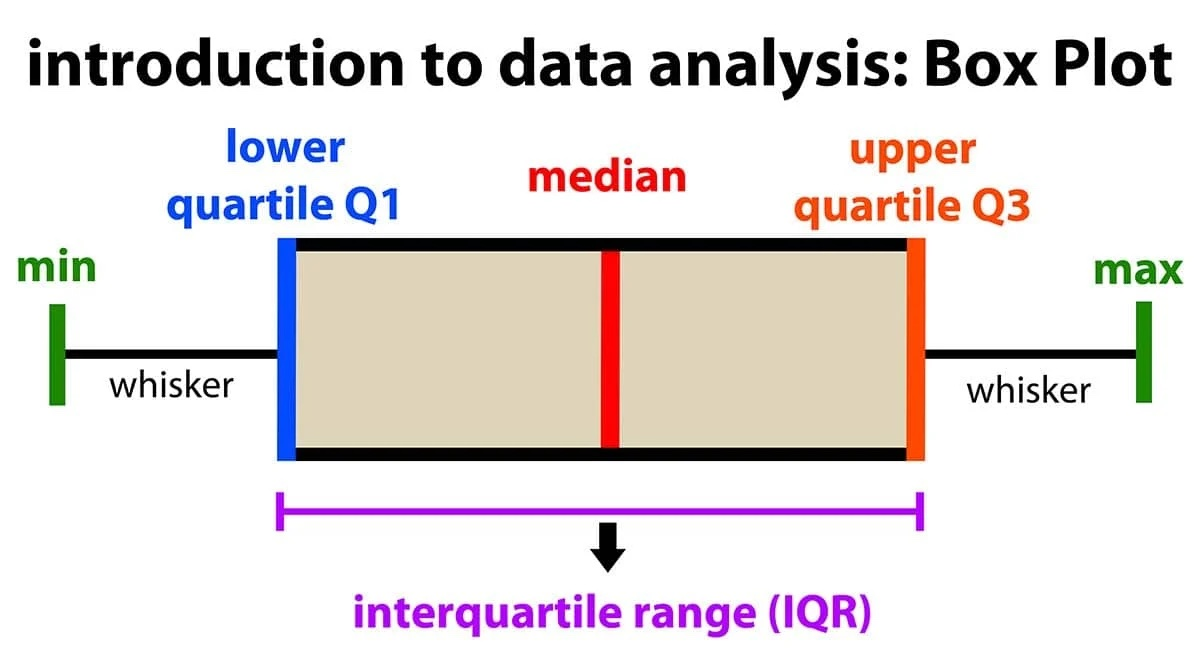

In [3]:
display(Image(filename='data/images/box-whisker-plot.jpg'))

In [165]:
def rotateXaxesLabels(ax, rotation=90):
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)

##### Happiness score per region

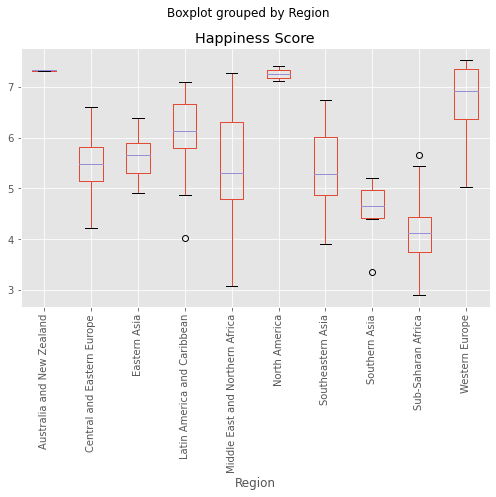

In [169]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))

df2016.boxplot(column=["Happiness Score"], by="Region", ax=ax)
rotateXaxesLabels(ax)

plt.tight_layout()

##### Sorted boxplot

In [179]:
grouped = df2016.groupby("Region")
df2016Boxplot = pd.DataFrame({region: values["Happiness Score"] for region, values in grouped})
medians = df2016Boxplot.median()
medians = medians.sort_values()

#df2016Boxplot.boxplot()

In [182]:
medians.index

Index(['Sub-Saharan Africa', 'Southern Asia', 'Southeastern Asia',
       'Middle East and Northern Africa', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean', 'Western Europe',
       'North America', 'Australia and New Zealand'],
      dtype='object')

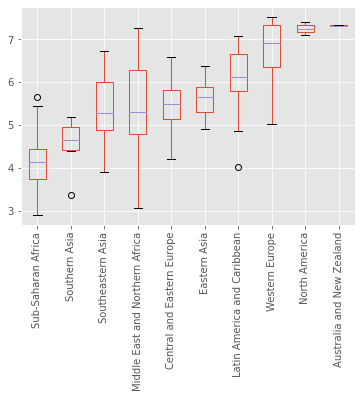

In [186]:
df2016Boxplot = df2016Boxplot[medians.index]
ax = df2016Boxplot.boxplot()
rotateXaxesLabels(ax)

### Scatterplot

##### Happiness - freedom

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

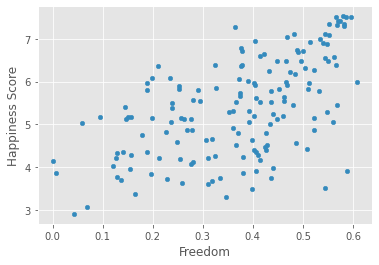

In [189]:
df2016.plot.scatter(x="Freedom", y="Happiness Score")

##### Happiness - economy

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

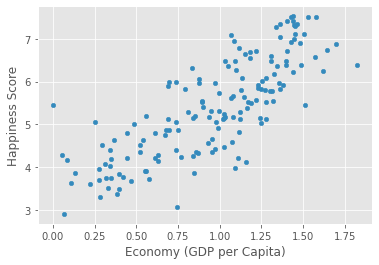

In [191]:
df2016.plot.scatter(x="Economy (GDP per Capita)", y="Happiness Score")

##### Happiness - Trust (Government Corruption)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

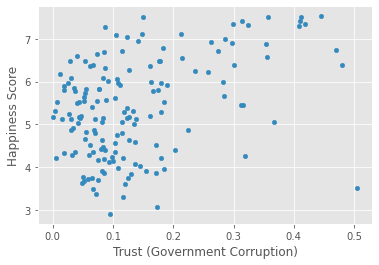

In [193]:
df2016.plot.scatter(x="Trust (Government Corruption)", y="Happiness Score")

##### Corrupt but happy countries

In [215]:
dfCorruptButHappy = df2016[(df2016["Trust (Government Corruption)"] < 0.05) & (df2016["Happiness Score"] > 6)]

corruptButHappyCountries = set(dfCorruptButHappy["Country"])

In [216]:
corruptButHappyCountries

{'Czech Republic', 'Slovakia', 'Thailand', 'Trinidad and Tobago'}

In [217]:
colors = ["red" if country in corruptButHappyCountries else "blue" for country in df2016["Country"]]

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

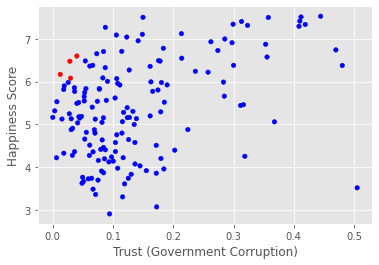

In [218]:
df2016.plot.scatter(x="Trust (Government Corruption)", y="Happiness Score", color=colors)

## Using seaborn

### Bar plots

##### Number of countries per region

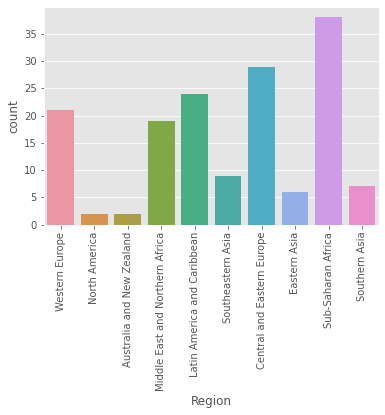

In [224]:
ax = sns.countplot(data=df2016, x="Region")
rotateXaxesLabels(ax)

##### Happiness scores per region (sorted)

In [226]:
df2016["Region"].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [245]:
orderRegionsByHappiness = df2016.groupby("Region")["Happiness Score"].mean().sort_values().index

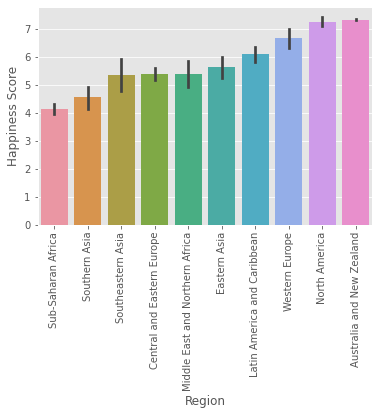

In [246]:
ax = sns.barplot(data=df2016, x="Region", y="Happiness Score", order=orderRegionsByHappiness)
rotateXaxesLabels(ax)

### Histograms

<AxesSubplot:xlabel='Happiness Score', ylabel='Count'>

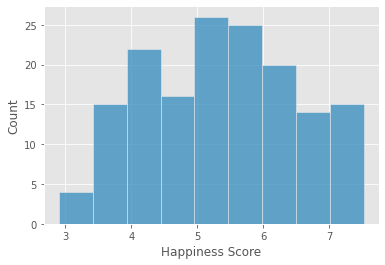

In [32]:
sns.histplot(data=df2016, x="Happiness Score")

### Boxplots

##### Happiness scores per region

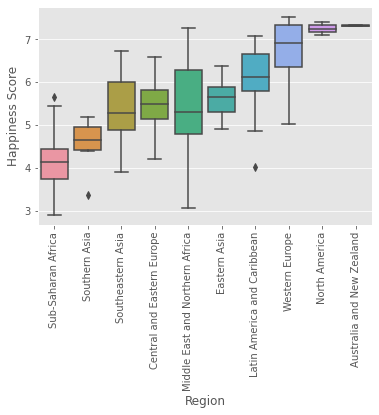

In [247]:
ax = sns.boxplot(data=df2016, x="Region", y="Happiness Score", order=orderRegionsByHappiness)
rotateXaxesLabels(ax)

### Scatterplots

In [248]:
df2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

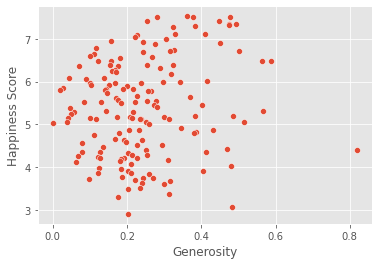

In [252]:
sns.scatterplot(data=df2016, x="Generosity", y="Happiness Score")

In [254]:
df2016[df2016["Generosity"] > 0.8]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
118,Myanmar,Southeastern Asia,119,4.395,4.327,4.463,0.34112,0.69981,0.3988,0.42692,0.20243,0.81971,1.50655


##### Regression plot

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

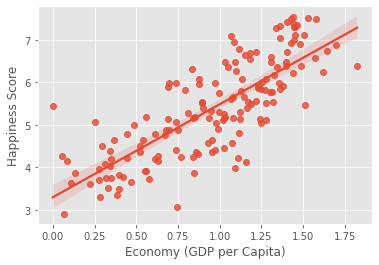

In [257]:
sns.regplot(data=df2016, x="Economy (GDP per Capita)", y="Happiness Score")